In [1]:
# warning 무시하기
import warnings
warnings.filterwarnings(action='ignore')
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
dataset = pd.read_csv("Tetuan City power consumption.csv")

In [3]:
dataset

,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1 Power Consumption
0,6.559,73.8,0.083,0.051,0.119,34055.69620
1,6.414,74.5,0.083,0.070,0.085,29814.68354
2,6.313,74.5,0.080,0.062,0.100,29128.10127
3,6.121,75.0,0.083,0.091,0.096,28228.86076
4,5.921,75.7,0.081,0.048,0.085,27335.69620
...,...,...,...,...,...,...
52411,7.010,72.4,0.080,0.040,0.096,31160.45627
52412,6.947,72.6,0.082,0.051,0.093,30430.41825
52413,6.900,72.8,0.086,0.084,0.074,29590.87452
52414,6.758,73.0,0.080,0.066,0.089,28958.17490


In [4]:
dataset.isnull().sum()

Temperature                 0
Humidity                    0
Wind Speed                  0
general diffuse flows       0
diffuse flows               0
Zone 1 Power Consumption    0
dtype: int64

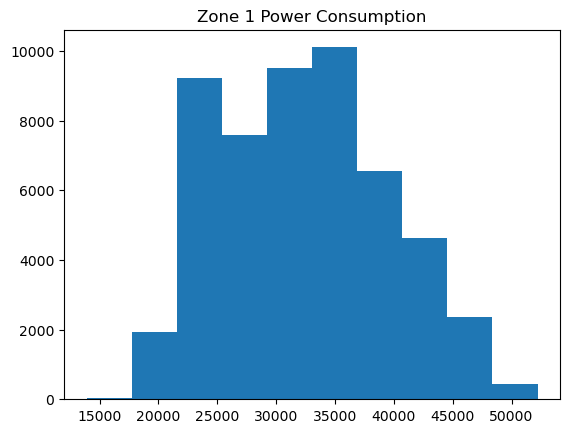

In [5]:
dataset.describe()
plt.hist(dataset['Zone 1 Power Consumption'])
plt.title('Zone 1 Power Consumption')
plt.show()

In [6]:
X=dataset[['Temperature','Humidity','Wind Speed']]
Y=dataset[['Zone 1 Power Consumption']]

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, Y,test_size=0.25,random_state=42)

In [8]:
X_train = X_train.to_numpy()
y_train = y_train.to_numpy()
X_test = X_test.to_numpy()
y_test = y_test.to_numpy()

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(32, activation = 'relu', input_shape = (3,)))
model.add(Dense(16, activation = 'relu'))
model.add(Dense(8, activation = 'relu'))
model.add(Dense(1))
model.compile(optimizer = 'rmsprop', loss = 'mse', metrics = ['mae'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                128       
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 8)                 136       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 801
Trainable params: 801
Non-trainable params: 0
_________________________________________________________________


In [10]:
N_EPOCHS = 70
history = model.fit(X_train, y_train, epochs = N_EPOCHS, validation_data=(X_test, y_test))

Epoch 1/70
1229/1229 [==============================] - 6s 4ms/step - loss: 504520512.0000 - mae: 18709.5469 - val_loss: 76778696.0000 - val_mae: 7305.1543
Epoch 2/70
1229/1229 [==============================] - 5s 4ms/step - loss: 63467716.0000 - mae: 6558.4624 - val_loss: 56655432.0000 - val_mae: 6070.5640
Epoch 3/70
1229/1229 [==============================] - 5s 4ms/step - loss: 53544016.0000 - mae: 5878.4609 - val_loss: 53049180.0000 - val_mae: 5803.1592
Epoch 4/70
1229/1229 [==============================] - 5s 4ms/step - loss: 51609632.0000 - mae: 5743.6440 - val_loss: 51865972.0000 - val_mae: 5794.6733
Epoch 5/70
1229/1229 [==============================] - 5s 4ms/step - loss: 50996168.0000 - mae: 5707.9810 - val_loss: 51378248.0000 - val_mae: 5735.5029
Epoch 6/70
1229/1229 [==============================] - 5s 4ms/step - loss: 50627416.0000 - mae: 5688.7227 - val_loss: 51195092.0000 - val_mae: 5710.7188
Epoch 7/70
1229/1229 [==============================] - 5s 4ms/step - loss

Epoch 54/70
1229/1229 [==============================] - 5s 4ms/step - loss: 39517592.0000 - mae: 5065.5659 - val_loss: 39585392.0000 - val_mae: 5058.1943
Epoch 55/70
1229/1229 [==============================] - 5s 4ms/step - loss: 39504900.0000 - mae: 5063.3091 - val_loss: 39427572.0000 - val_mae: 5073.0396
Epoch 56/70
1229/1229 [==============================] - 5s 4ms/step - loss: 39486248.0000 - mae: 5063.2476 - val_loss: 39641184.0000 - val_mae: 5046.3506
Epoch 57/70
1229/1229 [==============================] - 5s 4ms/step - loss: 39471084.0000 - mae: 5059.3091 - val_loss: 41079244.0000 - val_mae: 5043.3330
Epoch 58/70
1229/1229 [==============================] - 5s 4ms/step - loss: 39467848.0000 - mae: 5059.2334 - val_loss: 39412164.0000 - val_mae: 5074.4707
Epoch 59/70
1229/1229 [==============================] - 5s 4ms/step - loss: 39487076.0000 - mae: 5060.3633 - val_loss: 40102328.0000 - val_mae: 5035.8618
Epoch 60/70
1229/1229 [==============================] - 5s 4ms/step -

In [11]:
test_mse_score, test_mae_score=model.evaluate(X_test, y_test)

410/410 [==============================] - 1s 2ms/step - loss: 39202800.0000 - mae: 5027.1333


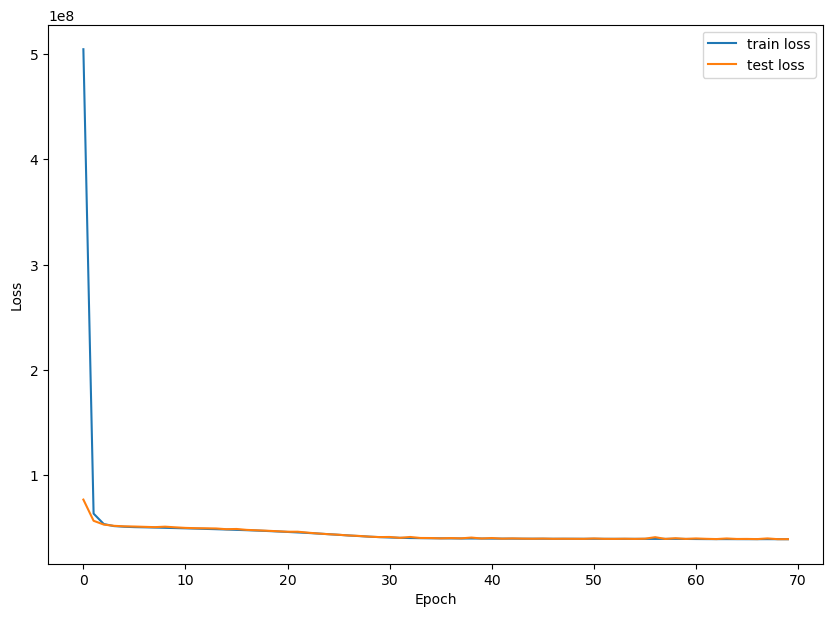

In [12]:
plt.figure(figsize=(10,7))
plt.plot(range(N_EPOCHS), history.history['loss'], label='train loss')
plt.plot(range(N_EPOCHS), history.history['val_loss'], label='test loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

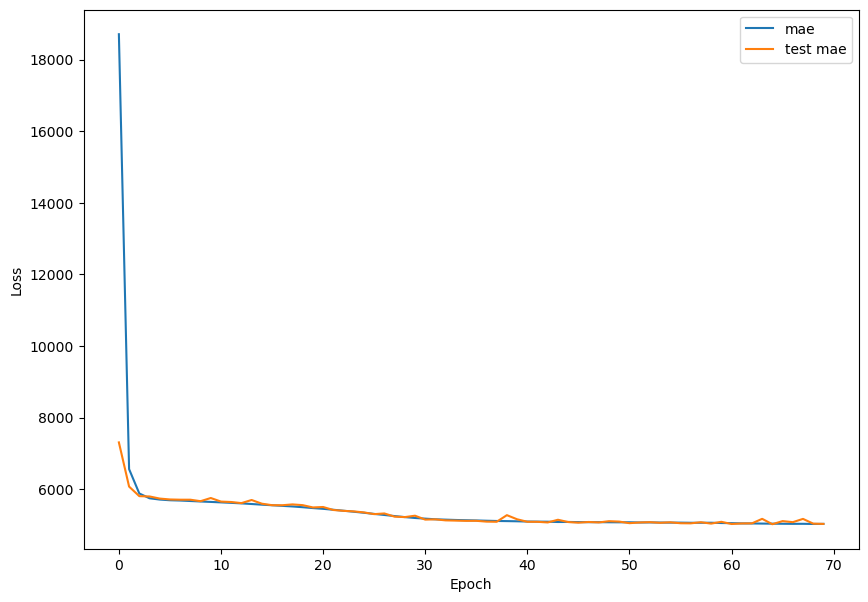

In [13]:
plt.figure(figsize=(10,7))
plt.plot(range(N_EPOCHS), history.history['mae'], label='mae')
plt.plot(range(N_EPOCHS), history.history['val_mae'], label='test mae')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()